Welcome back to another episode of "From Scratch" series on this blog, where we explore various machine learning algorithms by hand-coding and implementing them from scratch. 

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [0]:
X, y = make_moons(n_samples=5000, random_state=42, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
X[0:5]

array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       [ 0.22222051,  1.03355193],
       [ 0.74448612,  0.69288687]])

In [0]:
def plot(data, label):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel="x", ylabel="y")
    for i, point in enumerate(data):
        if label[i] == 0:
            ax.scatter(point[0], point[1], color='skyblue', edgecolors='white')
        else:
            ax.scatter(point[0], point[1], color='gold', edgecolors='white')
    plt.show()

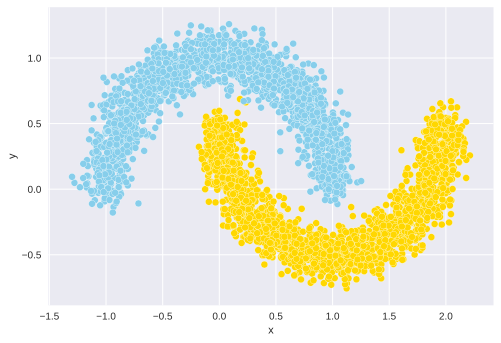

In [5]:
plot(X_train, y_train)

In [0]:
def one_hot_encode(labels):
    result = []
    for label in labels:
        if label:
            result.append([0, 1])
        else:
            result.append([1, 0])
    return np.array(result)

In [7]:
y_train[:5]

array([0, 1, 0, 1, 0])

In [8]:
one_hot_encode(y_train[:5])

array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

In [0]:
def softmax(x):
    result = []
    for instance in x:
        exp = np.exp(instance - np.max(instance))
        result.append(exp / exp.sum())
    return np.array(result)

In [10]:
softmax([[10, 10], [1, 4]])

array([[0.5       , 0.5       ],
       [0.04742587, 0.95257413]])

In [0]:
def relu(x):
    x[x < 0] = 0
    return x

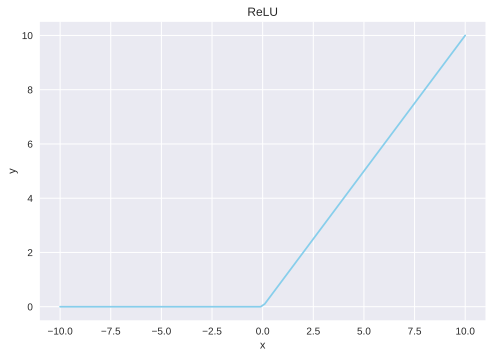

In [12]:
x = np.linspace(-10, 10, 100)
y = relu(np.linspace(-10, 10, 100))
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title='ReLU')
ax.plot(x, y, color='skyblue')
plt.show()

In [0]:
def init_network(n_features=2, n_class=2, n_hidden=64):
    model = {
        'W1': np.random.randn(n_features, n_hidden),
        'b1': np.random.randn(n_hidden),
        'W2': np.random.randn(n_hidden, n_class),
        'b2': np.random.randn(n_class)
    }
    return model

In [0]:
def forward(model, input_data):
    W1, W2 = model['W1'], model['W2']
    b1, b2 = model['b1'], model['b2']
    
    a1 = input_data @ W1 + b1
    z1 = relu(a1)
    a2 = z1 @ W2 + b2
    z2 = softmax(a2)

    return z1, z2

In [0]:
def fit(model, input_data, label, batch_size, iter_num):
    for epoch in range(iter_num):
        p = np.random.permutation(len(label))
        input_data, label = input_data[p], label[p]
        for i in range(0, len(label), batch_size):
            batch_data, batch_label = input_data[i:i + batch_size], label[i:i + batch_size]
            model = sgd(model, batch_data, batch_label)
    return model

In [0]:
def sgd(model, data, label, alpha=1e-4):
    grad = backward(model, data, label)
    for layer in grad.keys():
        model[layer] += alpha * grad[layer]
    return model

In [0]:
def backward(model, data, label):
    z1, z2 = forward(model, data)
    label = one_hot_encode(label)
    db2_temp = label - z2
    db2 = np.sum(db2_temp, axis=0)
    dW2 = z1.T @ db2_temp
    db1_temp = db2_temp @ model['W2'].T
    db1_temp[z1 <= 0] = 0
    db1 = np.sum(db1_temp, axis=0)
    dW1 = data.T @ db1_temp
    return {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}

In [0]:
def test(train_data, train_label, test_data, test_label, batch_size, iter_num, n_experiment):
    acc_lst = []
    for k in range(n_experiment):
        model = init_network()
        model = fit(model, train_data, train_label, batch_size=batch_size, iter_num=iter_num)
        _, pred_label = forward(model, test_data)
        pred_label = np.array([np.argmax(pred) for pred in pred_label])
        acc_lst.append((pred_label == test_label).sum() / test_label.size)
    acc_lst = np.array(acc_lst)
    print('Mean Accuracy: {0:.5g}, Standard Deviation: {1:.5g}'.format(acc_lst.mean(), acc_lst.std()))

In [19]:
test(X_train, y_train, X_test, y_test, 10, 10, 100)

Mean Accuracy: 0.94541, Standard Deviation: 0.019558


In [0]:
class NeuralNet:
    
    def __init__(self, n_hidden, n_features=2, n_class=2):
        self.params = {
            'W1': np.random.randn(n_features, n_hidden),
            'b1': np.random.randn(n_hidden),
            'W2': np.random.randn(n_hidden, n_class),
            'b2': np.random.randn(n_class)
        }
    
    def forward(self, input_data):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = input_data @ W1 + b1
        self.params['z1'] = relu(a1)
        a2 = self.params['z1'] @ W2 + b2
        self.params['z2'] = softmax(a2)
        
        return self.params['z1'], self.params['z2']
    
    def fit(self, input_data, label, batch_size, iter_num):
        for epoch in range(iter_num):
            p = np.random.permutation(len(label))
            input_data, label = input_data[p], label[p]
            for i in range(0, len(label), batch_size):
                batch_data, batch_label = input_data[i:i + batch_size], label[i:i + batch_size]
                self.sgd(batch_data, batch_label)
    
    def sgd(self, data, label, alpha=1e-4):
        grad = self.backward(data, label)
        for layer in grad.keys():
            self.params[layer] += alpha * grad[layer]
    
    def backward(self, data, label):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        z1, z2 = self.forward(data)
        
        label = one_hot_encode(label)
        db2_temp = label - z2
        db2 = np.sum(db2_temp, axis=0)
        dW2 = z1.T @ db2_temp
        db1_temp = db2_temp @ W2.T
        db1_temp[z1 <= 0] = 0
        db1 = np.sum(db1_temp, axis=0)
        dW1 = data.T @ db1_temp
        
        return {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
    
    def test(self, train_data, train_label, test_data, test_label, batch_size, iter_num):
        self.fit(train_data, train_label, batch_size=batch_size, iter_num=iter_num)
        _, pred_label = self.forward(test_data)
        pred_label = np.array([np.argmax(pred) for pred in pred_label])
        acc = (pred_label == test_label).sum() / test_label.size
        return acc

In [21]:
net = NeuralNet(99)
net.test(X_train, y_train, X_test, y_test, 20, 10)

0.9496

In [0]:
def test_class(min_neuron, max_neuron, n_trial):
    acc_lst = []
    domain = np.arange(min_neuron, max_neuron)
    for n_neuron in domain:
        acc_ = []
        for _ in range(n_trial):
            net = NeuralNet(n_neuron)
            acc = net.test(X_train, y_train, X_test, y_test, 10, 100)
            acc_.append(acc)
        acc_score = sum(acc_) / len(acc_)
        acc_lst.append(acc_score)
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel="Number of Neurons", ylabel="Accuracy")
    ax.plot(domain, acc_lst, color='skyblue')
    plt.show()

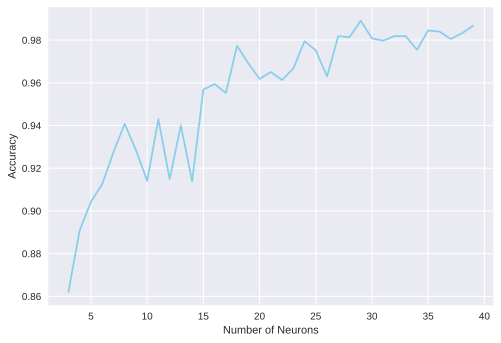

In [24]:
test_class(3, 40, 3)

$$A_1 = XW_1 + b_1$$
$$Z_1 = \text{max}(0, A_1)$$
$$A_2 = Z_1 W_2 + b_2$$
$$Z_2 = \sigma(A_2)$$
$$L = - \sum_{i = 1}^n y_i \log(z_i), \ z_i \in Z_2, y_i \in y$$
$$z_i = \sigma(a_i) = \frac{e^{a_i}}{\sum_{k = 1}^n e^{a_k}}, \ a_i \in A_2$$

$$\begin{align}
\frac{\partial z_i}{\partial a_i} &= \frac{\partial}{\partial a_i} \bigg[\frac{e^{a_i}}{\sum_{k = 1}^n e^{a_k}}\bigg] \\
&= \frac{e^{a_i}}{\sum_{k = 1}^n e^{a_k}} - e^{a_i} e^{a_i} \left(\sum_{k = 1}^n e^{a_k}\right)^{-2} \\
&= z_i - z_i^2 \\
&= z_i(1 - z_i)
\end{align}$$

$$\begin{align}
\frac{\partial z_i}{\partial a_{j \neq i}} &= \frac{\partial}{\partial a_j} \bigg[\frac{e^{a_i}}{\sum_{k = 1}^n e^{a_k}}\bigg] \\
&= - e^{a_i} e^{a_j} \left(\sum_{k = 1}^n e^{a_k}\right)^{-2} \\
&= - z_i z_j
\end{align}$$

$$\begin{align}
\frac{\partial L}{\partial a_i} &= \frac{\partial}{\partial a_i} \bigg[ - \sum_{k = 1}^m y_k \log(z_k) \bigg] \\ 
&= - \sum_{k = 1}^m y_k \frac{\partial \log(z_k)}{\partial a_i} \\
&= - \sum_{k = 1}^m y_k \frac{\partial \log(z_k)}{\partial z_k} \frac{\partial z_k}{\partial a_i} \\
&= - \sum_{k = 1}^m \frac{y_k}{z_k} \frac{\partial z_k}{\partial a_i} \\
&= - \bigg(\frac{y_i}{z_i}\frac{\partial z_i}{\partial a_i} + \sum_{k = 1, k \neq i}^m \frac{y_k}{z_k} \frac{\partial z_k}{\partial a_i} \bigg) \\
&= - \frac{y_i}{z_i} \cdot z_i(1 - z_i) + \sum_{k = 1, k \neq i}^m \frac{y_k}{z_k} \cdot z_k z_i \\
&= - y_i + y_i z_i + \sum_{k = 1, k \neq i}^m y_k z_i \\
&= z_i \left(y_i + \sum_{k = 1, k \neq i}^m y_k \right) - y_i \\
&= z_i \left(\sum_{k = 1}^m y_k \right) - y_i \\
&= z_i - y_i
\end{align}$$

$$ \frac{\partial L}{\partial A_2} = Z_2 - y$$

$$\frac{\partial L}{\partial W_2} = Z_1^T \frac{\partial L}{\partial A_2} = Z_1^T (Z_2 - y)$$

$$\frac{\partial L}{\partial b_2} = Z_2 - y$$

$$\frac{\partial L}{\partial W_1} = X^T I[(Z_2 - y)W_2^T]$$

$$I(\forall x \in X) = 
\begin{cases}
1 & x > 0 \\
0 & x \leq 0
\end{cases}$$